In [2]:
#%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
import re
import datetime

In [3]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [4]:
df = pd.read_csv(url, sep=';')

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [5]:
#Task 1.1 Identify 5 unique features from this data set.
#5 unike egenskaper_Fra dataene:
#Tid_Forsiket_Avgang, 
#Tid_forsinket_Ankomst, 
#Restkappasitet_Passjasjerer, 
#Tur_Whit_faulti_Passasjer_sensor, 
# Uke_Dag,

In [6]:
#1.2 Apply feature engineering on them in Python.

In [7]:
#convert object to datetime to calculate time
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce')


In [8]:
# oppretter en colone med false / true verdier hvor pasasjer teller er negative. Antar at negativ verdi = feil på sensor
df['Passasjerer_Ombord_Censor_defekt'] = np.where(df['Passasjerer_Ombord'] > 0, "false", "true")
#df["Passasjerer_Ombord_Censor_defekt"] = df.Passasjerer_Ombord.isnull()
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passasjerer_Ombord_Censor_defekt
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,0 days 10:53:53,0 days 10:53:59,0 days 10:53:00,0 days 10:53:00,112,5,false
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,0 days 13:12:20,0 days 13:12:26,0 days 13:12:00,0 days 13:12:00,112,5,false
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,0 days 10:18:56,0 days 10:19:21,0 days 10:19:00,0 days 10:19:00,112,6,false
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,0 days 13:52:04,0 days 13:52:26,0 days 13:51:00,0 days 13:51:00,112,10,false
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,0 days 07:34:13,0 days 07:34:53,0 days 07:33:00,0 days 07:33:00,112,10,false


In [9]:
# oppretter Colomn Restkappasitet_Passjasjerer
df['Restkappasitet_Passjasjerer'] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]
#Oppretter Colomn tid forsinket avgang fra holdeplass
df['Tid_Forsiket_Avgang'] = df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"] - df["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"]
#oppretter Colomn Tid_forsinket_Ankomst
df['Tid_forsinket_Ankomst'] = df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"] - df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]
# oppretter Colomn Restkappasitet_Passjasjerer
#df['Restkappasitet_Passjasjerer'] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]


In [10]:
#convert timedelta to seconds stores as float
df["Forsinke_Ankomst_sec"]=df['Tid_forsinket_Ankomst'].dt.total_seconds()
#convert timedelta to seconds stores as float
df["Forsinke_Avgang_sec"]=df['Tid_Forsiket_Avgang'].dt.total_seconds()

In [11]:
# Konverterer Dato til datetime og Tar Ukedag ut av Datoen 
#df['Dato']
df['Dato'] = pd.to_datetime( df['Dato'])
df['Ukedag'] = df['Dato'].dt.day_name()

In [12]:
df.head()
#ser at noen av verdiene for Tid_Forsiket_Avgang & Tid_forsinket_Ankomst blir negative forde de går over 24 timer.
#Velger å fikkse dette med for loupen fra lab3 oppgave 3

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passasjerer_Ombord_Censor_defekt,Restkappasitet_Passjasjerer,Tid_Forsiket_Avgang,Tid_forsinket_Ankomst,Forsinke_Ankomst_sec,Forsinke_Avgang_sec,Ukedag
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,0 days 10:53:00,112,5,false,107,0 days 00:00:59,0 days 00:00:53,53.0,59.0,Thursday
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,0 days 13:12:00,112,5,false,107,0 days 00:00:26,0 days 00:00:20,20.0,26.0,Saturday
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,0 days 10:19:00,112,6,false,106,0 days 00:00:21,-1 days +23:59:56,-4.0,21.0,Sunday
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,0 days 13:51:00,112,10,false,102,0 days 00:01:26,0 days 00:01:04,64.0,86.0,Monday
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,0 days 07:33:00,112,10,false,102,0 days 00:01:53,0 days 00:01:13,73.0,113.0,Thursday


In [13]:
#for loupen fra lab3 oppgave 3
#For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['Tid_Forsiket_Avgang'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        df.loc[index, 'Tid_Forsiket_Avgang'] = datetime.timedelta(hours=24)-(row['Tid_Forsiket_Avgang']+ datetime.timedelta(abs(row['Tid_Forsiket_Avgang'].days)))

In [14]:
#for loupen fra lab3 oppgave 3
#For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['Tid_forsinket_Ankomst'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        df.loc[index, 'Tid_forsinket_Ankomst'] = datetime.timedelta(hours=24)-(row['Tid_forsinket_Ankomst']+ datetime.timedelta(abs(row['Tid_forsinket_Ankomst'].days)))

In [15]:
#plot do not suport timedelta so
#convert timedelta to seconds and stores as float
df["Forsinke_Ankomst_sec"]=df['Tid_forsinket_Ankomst'].dt.total_seconds()
#convert timedelta to seconds stores as float
df["Forsinke_Avgang_sec"]=df['Tid_Forsiket_Avgang'].dt.total_seconds()

In [16]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passasjerer_Ombord_Censor_defekt,Restkappasitet_Passjasjerer,Tid_Forsiket_Avgang,Tid_forsinket_Ankomst,Forsinke_Ankomst_sec,Forsinke_Avgang_sec,Ukedag
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,0 days 10:53:00,112,5,false,107,0 days 00:00:59,0 days 00:00:53,53.0,59.0,Thursday
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,0 days 13:12:00,112,5,false,107,0 days 00:00:26,0 days 00:00:20,20.0,26.0,Saturday
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,0 days 10:19:00,112,6,false,106,0 days 00:00:21,0 days 00:00:04,4.0,21.0,Sunday
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,0 days 13:51:00,112,10,false,102,0 days 00:01:26,0 days 00:01:04,64.0,86.0,Monday
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,0 days 07:33:00,112,10,false,102,0 days 00:01:53,0 days 00:01:13,73.0,113.0,Thursday


In [17]:
#feature engineering on Forsinket_Avgang

<AxesSubplot:>

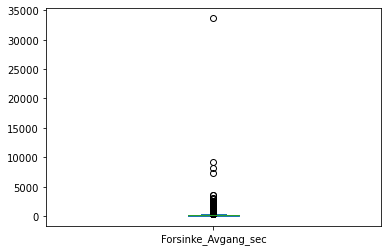

In [18]:
# kjører box plot for å til passe Forsinket_avgang før visualisering
df["Forsinke_Avgang_sec"].plot.box()

In [19]:
# Ser at den er det er outliers så minimerer det
#med funksjonen fra Lab3 oppgave 3
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .04
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

In [20]:
df["Forsinke_Avgang_sec"] = remove_outlier(df["Forsinke_Avgang_sec"])

<AxesSubplot:>

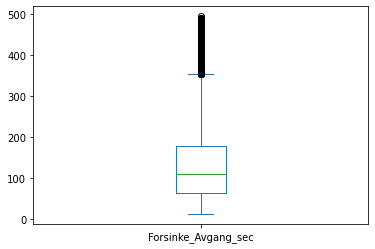

In [21]:
#Kjører så et nytt boxplot for å se om det er blitt bedre
#tydlig forbedring
df["Forsinke_Avgang_sec"].plot.box()

In [22]:
#feature engineering on Forsinket_Ankomst

<AxesSubplot:>

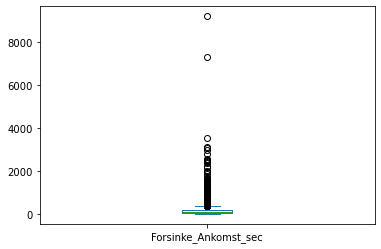

In [23]:
# som med forsinket_Avgang over trengs det og fjerne outlier
df["Forsinke_Ankomst_sec"].plot.box()

In [24]:
#kaller på funksjonen med for lopen som minnimerer outlier
df["Forsinke_Ankomst_sec"] = remove_outlier(df["Forsinke_Ankomst_sec"])


<AxesSubplot:>

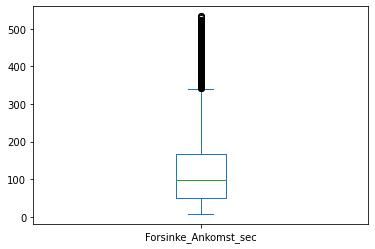

In [25]:
#tydelig forbedring
df["Forsinke_Ankomst_sec"].plot.box()

In [26]:
#feature engineering on Restkappasitet_Passjasjerer

<AxesSubplot:>

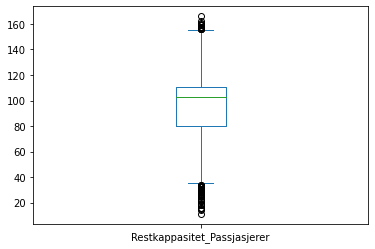

In [27]:
df["Restkappasitet_Passjasjerer"].plot.box()

<AxesSubplot:xlabel='Linjetype', ylabel='Restkappasitet_Passjasjerer'>

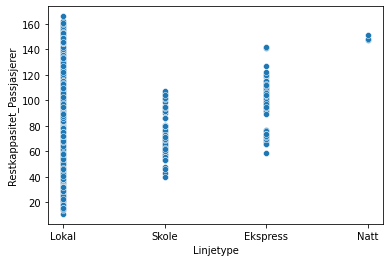

In [28]:
#Kjører et scatter plot for å få oversikt
# Set att det kun er to Turer på Linjetype Natt som har rest kappasitet hvis de tas med så blir det missvisning i et barplot
# dette er å regnes som outlier med defenisjone som er satt i funksjonen som fjerner ott lier
sns.scatterplot(x=df['Linjetype'], y=df['Restkappasitet_Passjasjerer'])

In [29]:
# Kaller funksjone som fjerner outlier for Restkappasitet_passjasjerer
df["Restkappasitet_Passjasjerer"] = remove_outlier(df["Restkappasitet_Passjasjerer"])

<AxesSubplot:>

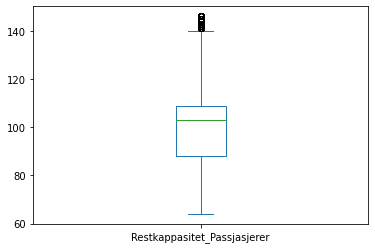

In [32]:
#Ser en forbedring ved box plotet
df["Restkappasitet_Passjasjerer"].plot.box()

<AxesSubplot:xlabel='Linjetype', ylabel='Restkappasitet_Passjasjerer'>

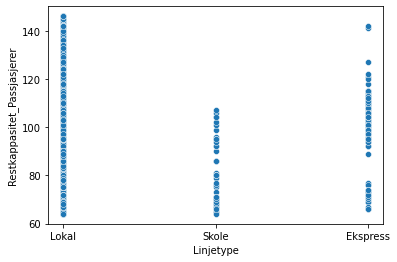

In [33]:
#Kjører et Scater plot og bekrefter at Natt er fjernet fra plotet.
sns.scatterplot(x=df['Linjetype'], y=df['Restkappasitet_Passjasjerer'])

In [34]:
#feature engineering on Tur_Whit_faulti_Passasjer_sensor,
# INgen featre enginering other than macing the column whit false or true values earlier added.

In [35]:
#feature engineering on Ukedag for visulaiseringen med uke dag er det ikke nødvendig med mye feauter enginering on Ukedag,
# men for pasasjerer om bord som er y verdien brukt til visualiseringern er det justert for outliers.

<AxesSubplot:>

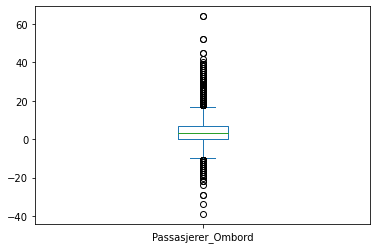

In [36]:
df["Passasjerer_Ombord"].plot.box()

In [37]:
df["Passasjerer_Ombord"] = remove_outlier(df["Passasjerer_Ombord"])

<AxesSubplot:>

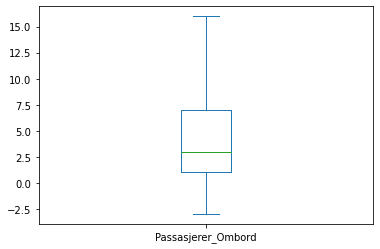

In [38]:
df["Passasjerer_Ombord"].plot.box()

In [39]:
#1.3 Visualize each feature


In [ ]:
#Visualize Tid_Forsiket_Avgang

<AxesSubplot:xlabel='Linjetype', ylabel='Forsinke_Avgang_sec'>

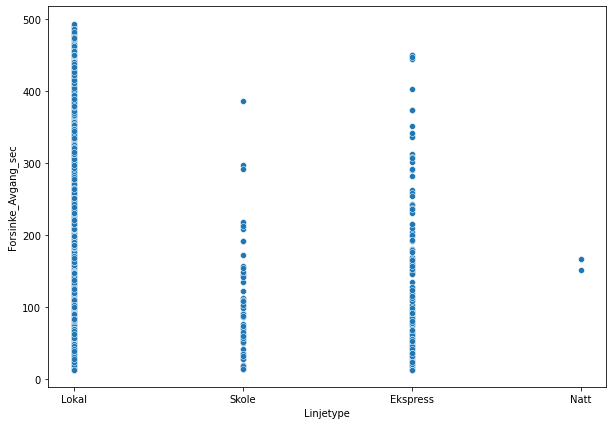

In [40]:
#plotet under viser hvilke linjetype det er mest forsinket avgang for og hvor mange secunder det er forsinket.
ax, fig = plt.subplots(figsize=[10,7])
sns.scatterplot(x=df['Linjetype'], y=df['Forsinke_Avgang_sec']) 


In [41]:
#Visualize Tid_forsinket_Ankomst

<AxesSubplot:xlabel='Linjetype', ylabel='Forsinke_Ankomst_sec'>

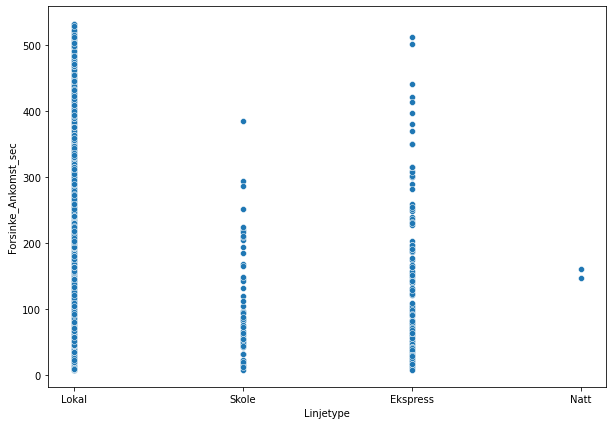

In [42]:
#plot som viser hvilke Linjetype type oftest kommer forsinket til hodeplass i antal sekkunder.
# Lokal har flest forsinkelser, men den er det også flere Turer av, 
ax, fig = plt.subplots(figsize=[10,7])
sns.scatterplot(x=df['Linjetype'], y=df['Forsinke_Ankomst_sec'])

In [43]:
#Visualize Restkappasitet_Passjasjerer

<AxesSubplot:xlabel='Linjetype', ylabel='Restkappasitet_Passjasjerer'>

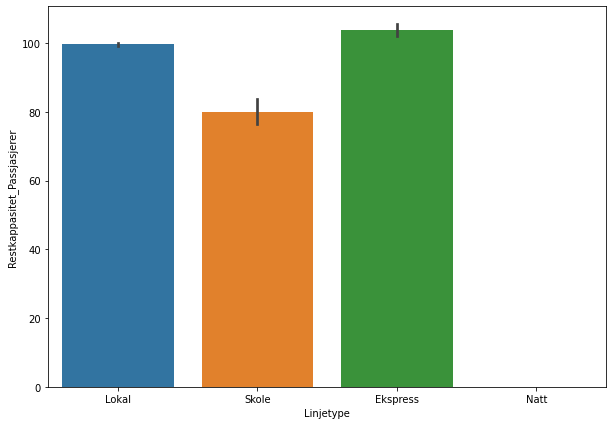

In [44]:
# visualisering av Restkapasitet på bussene opp i mot Linjetype.
#Natt er ikke med i barplotet forde det kun var få turer.
# Det ville blit miss visende nå natt var med som en søyle. derfor ble det fjernet når det ble justert for outliers.

ax, fig = plt.subplots(figsize=[10,7])
sns.barplot(x=df['Linjetype'], y=df['Restkappasitet_Passjasjerer'])

In [45]:
#Visualize Tur_Whit_faulti_Passasjer_sensor

<AxesSubplot:xlabel='Passasjerer_Ombord_Censor_defekt', ylabel='Kjøretøy_Kapasitet'>

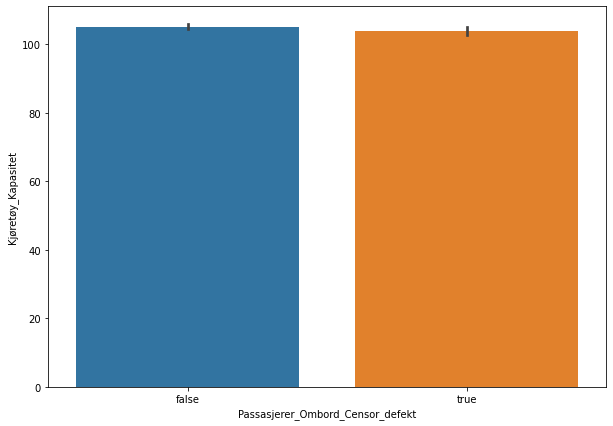

In [46]:
#Kjøretøy_Kapasitet
# feil på pasajer sensor mot Kjøretøy_kapasitet. 
#plotet viser at kjøretøyets kapasitet ikke har korolasjon til sensor_defekt
#Ville egentig sjekke mot Buss id men klarte ikke å få det ut av TurId
ax, fig = plt.subplots(figsize=[10,7])
sns.barplot(x='Passasjerer_Ombord_Censor_defekt', y='Kjøretøy_Kapasitet', data=df) 

In [47]:
#Visualize Uke_Dag,

<AxesSubplot:xlabel='Passasjerer_Ombord', ylabel='Ukedag'>

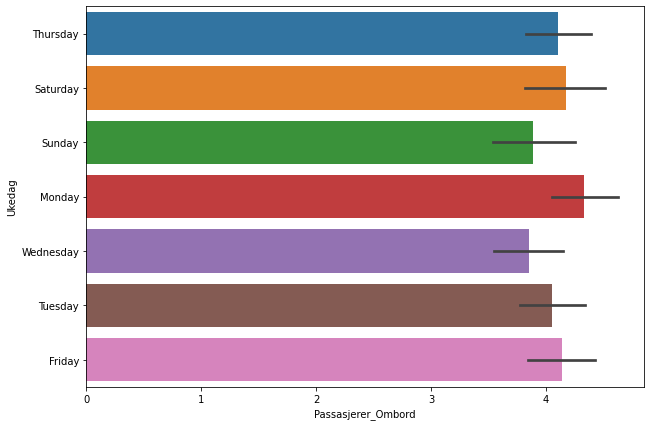

In [48]:
#Graf over Uke Dag opp imot Passaajserer ombord i bussen
ax, fig = plt.subplots(figsize=[10,7])
sns.barplot(x=df['Passasjerer_Ombord'], y=df['Ukedag'])
#Barplottet er korigert for outlier og da er det antatt at det her fjernert de fleste negative verdier.
#De negative verdiene brude vært fjernet helt fra datasettet siden det antagelig skyldes feil på sensorene,
# men det her jeg ikke funnet en god løsning på så da blir det med at outliers er fjernet.